# Tratamiento final de  los textos
# Bitacora 3


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.util import ngrams
from nltk.probability import FreqDist
import inflection
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
nlp = English()

In [2]:
#======================== Funciones Necesarias ===================================#
# Eliminar caracteres no alfabeticos
regex = re.compile('[^A-Za-z]')
def texClean1(x,rg): return rg.sub(' ',str(x))
# Eliminar palabras vacias
def texClean2(x):
    my_doc = nlp(str(x))
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    filtered_sentence =[]
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    return ' '.join(filtered_sentence)
# Poner todo en Singular
def SingTex(x):
    sentence = str(x).split()
    text = [inflection.singularize(wrd) for wrd in sentence]
    result = ' '.join(text)
    return result
# Eliminar duplicados
def texClean4(x):
    x = str(x)
    resultwords = list(dict.fromkeys(x.split()))
    result = ' '.join(resultwords)
    return result
# Eliminar palabras segun diccionario
Dic1 = pd.read_csv('palabras1.csv', engine='python',sep=",")
Dic1 = np.array(Dic1[Dic1.Ind.isnull()].word)

Dic2 = pd.read_csv('palabras2.csv', engine='python',sep="\t")
Dic2 = np.array(Dic2[Dic2.Ind.isnull()].word)

Dic3 = pd.read_csv('palabras3.csv', engine='python',sep="\t")
Dic3 = np.array(Dic3) # Diccionario corte por frecuencia
Dic3 = Dic3.reshape(Dic3.shape[0],)

DicF = np.append(np.append(Dic1,Dic2),Dic3)

def texClean3(x,DIC):
    x = str(x)
    querywords = x.split()
    resultwords  = [word for word in querywords if word.lower() not in DIC]
    result = ' '.join(resultwords)
    return result
# longitud de un texto
def LENW(x):return len(tknzr.tokenize(str(x)))
## Tratamiento completo de el texto
def TratTex(x):
    text = str(x).lower()
    text = texClean1(text,regex)
    text = texClean2(text)
    text = SingTex(text)
    text = texClean3(text,DicF)
    text = texClean4(text)
    return text

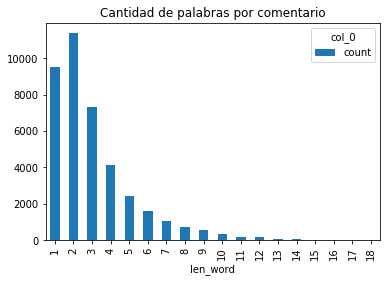

In [3]:
# Lectura de los datos --------------------------------------------------------#
data = pd.read_csv('datos_finales.csv', engine='python',sep="|")
# Tratamiento de el texto -----------------------------------------------------#
data_F = data.assign(caption = data.caption.map(lambda p: TratTex(p)))
# Eliminacion de Textos sin contenido -----------------------------------------#
data_F = data_F.assign(len_word = data_F.caption.map(LENW))
data_F = data_F[data_F.len_word != 0]
pd.crosstab(data_F.len_word, columns='count').plot.bar()
plt.title("Cantidad de palabras por comentario")
plt.show()

In [4]:
#Creaccion de diccionario de palabras---------------------------------------------#
def NGRAM(x,n):
    token=nltk.word_tokenize(str(x))
    bigrams=ngrams(token,n)
    return list(bigrams)
def Table_NGRAM(data,n):
    n_grams = data.caption.map(lambda p: NGRAM(p,n))
    n_grams = sum(n_grams,[])
    table_n = pd.DataFrame(FreqDist(n_grams), index =[0]).T
    table_n.columns = ['Count']
    table_n = table_n.sort_values('Count', ascending = False)
    return table_n

(996, 1)

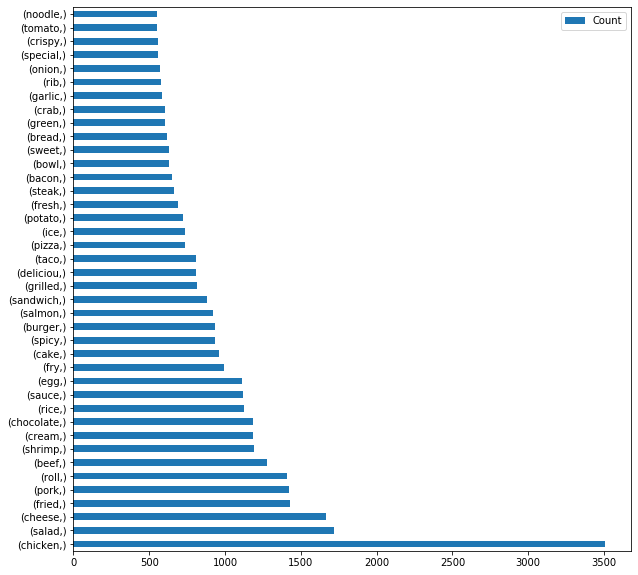

In [14]:
# n-gramss n = 1 ..............................................................#
table_n1 = Table_NGRAM(data_F,1)
plt.rcParams['figure.figsize'] = [10, 10]
table_n1[:40].plot.barh()
table_n1.shape

(33674, 1)

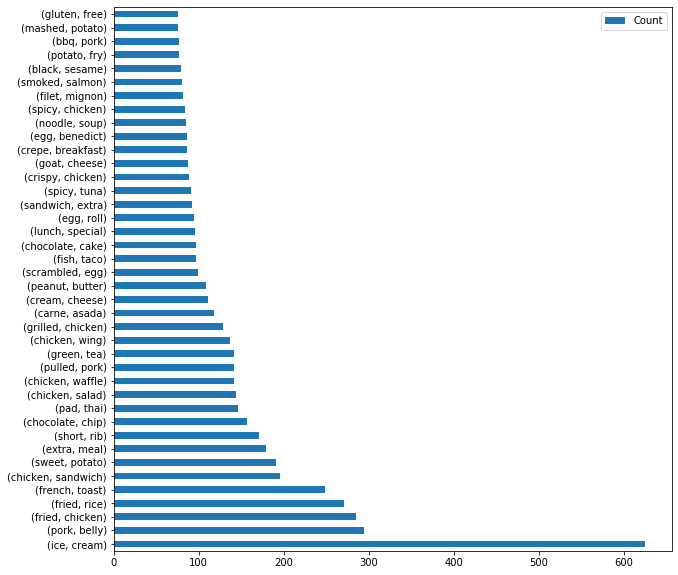

In [11]:
table_n2 = Table_NGRAM(data_F,2)

plt.rcParams['figure.figsize'] = [10, 10]
table_n2[:40].plot.barh()
table_n2.shape

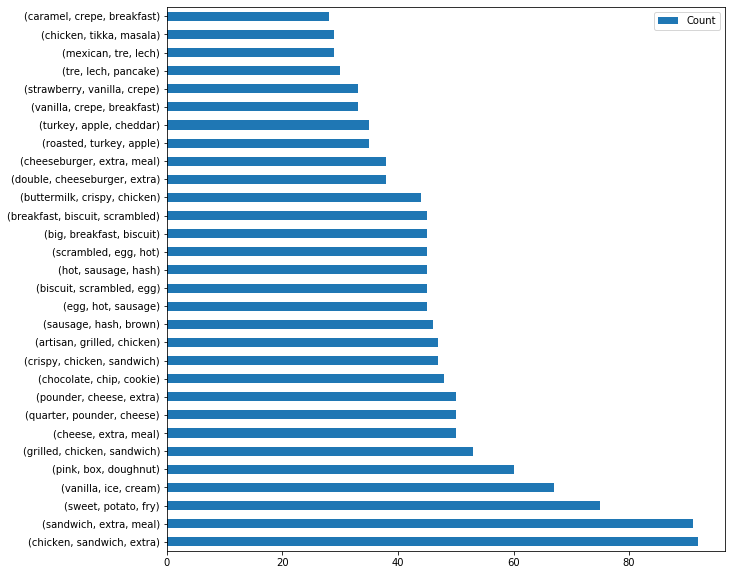

In [6]:
table_n3 = Table_NGRAM(data_F,3)
plt.rcParams['figure.figsize'] = [10, 10]
table_n3[:30].plot.barh()
table_n3.shape


In [6]:
data_F[data_F.len_word > 14].caption

1335     burger albertum sirloin double smoked bacon ch...
2141     grilled vegetable pizza herb roasted tomato ga...
3242     asian chicken salad mixed green cabbage red pe...
3363     chile relleno empanada grilled cheese smoked b...
7105     house burger blend bacon onion jam pickle lett...
7399     veggie combo stuffed grape leafe hummu falafel...
8929     seared tuna entree sesame crust korean bbq sau...
9530     grilled vegetable pizza herb roasted tomato ga...
12376    thai tea cake cream sauce honey toast sea salt...
13599    salmon tuna shrimp tempura red cabbage green o...
15668    shrimp chip pimento cheese corn green tea brea...
16565    noodle rice hot chicken bowl shredded carrot m...
20591    potato arugula beef pulled short rib carameliz...
22817    brunch apple pancake blueberry compote maple s...
25081    salmon belly nigiri kurobutum pork scallop gyo...
25776    veggie pad thai sweet sour tofu bean scallion ...
26181    grilled chimichurri chicken breast sandwich bu.

In [16]:
table_n2.to_csv()

',,Count\nice,cream,625\npork,belly,294\nfried,chicken,285\nfried,rice,271\nfrench,toast,249\nchicken,sandwich,195\nsweet,potato,191\nextra,meal,179\nshort,rib,171\nchocolate,chip,157\npad,thai,146\nchicken,salad,144\nchicken,waffle,142\npulled,pork,142\ngreen,tea,141\nchicken,wing,137\ngrilled,chicken,129\ncarne,asada,118\ncream,cheese,111\npeanut,butter,109\nscrambled,egg,99\nfish,taco,97\nchocolate,cake,97\nlunch,special,96\negg,roll,94\nsandwich,extra,92\nspicy,tuna,91\ncrispy,chicken,89\ngoat,cheese,87\ncrepe,breakfast,86\negg,benedict,86\nnoodle,soup,85\nspicy,chicken,84\nfilet,mignon,82\nsmoked,salmon,80\nblack,sesame,79\npotato,fry,77\nbbq,pork,77\nmashed,potato,76\ngluten,free,76\nlobster,roll,75\ncrab,cake,74\nhash,brown,73\nolive,oil,72\ncrab,leg,72\nsticky,rice,72\nshrimp,tempura,72\ncarrot,cake,72\nsalted,caramel,69\nvanilla,ice,69\nwhite,chocolate,68\nblack,bean,67\ngreek,salad,67\ndouble,cheeseburger,67\ncaesar,salad,66\npork,chop,65\ngrilled,cheese,63\npink,box,61\nbone

In [9]:
data_F[data_F.len_word == 18].caption

28579    half pound brisket burger beer cheese sauce ja...
Name: caption, dtype: object

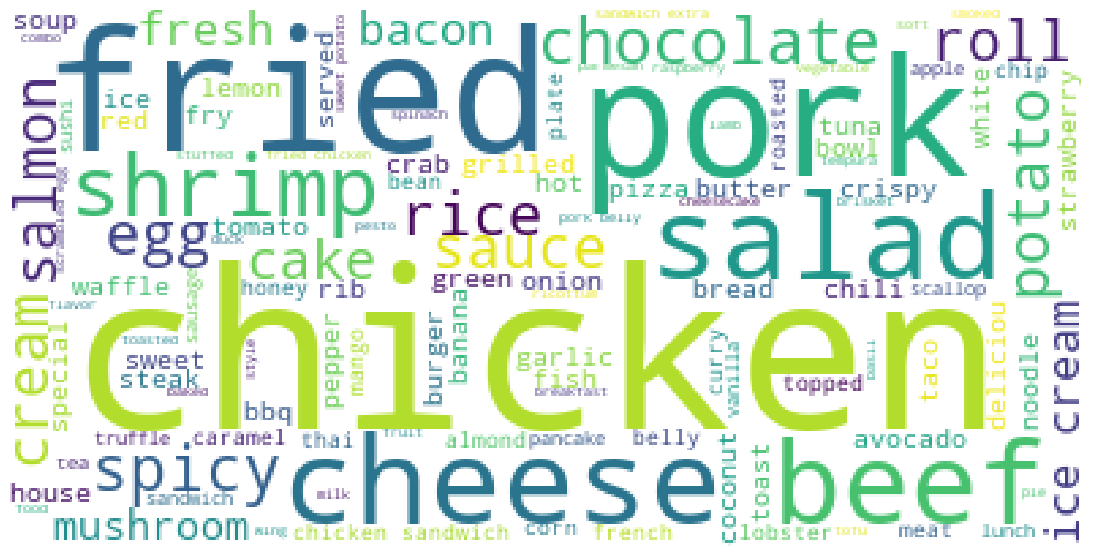

In [10]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=450,background_color="white").generate(data_F.caption.sum())
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
